# FINAL EXERCISE
The Kaggle dataset https://www.kaggle.com/akram24/wine-pca contains data on the properties of different wines, as well as information on the market segment to which they belong.
The exercice asks:
1. First, carry out an EDA on the data and explain which variables are present and how they are likely to influence.
2. Build a clustering model with any of the algorithms that have been discussed (or any other if the student wishes) and compare the results obtained with the Customer_Segment variable. Do you get the same number of clusters? If so, do the values match those in that column?
3. Build a predictive model that uses a previous PCA to construct the input artificial features and evaluate the output against the same Customer_Segment variable


### Description of variables
* **Alcohol**: degrees of alcohol
* **Malic_Acid**: amount of Malic Acid
* **Ash**: Ash levels
* **Ash_Alcanity**: Alcanity ash
* **Magnesium**: Amount of magnesium
* **Total_Phenols**: total phenols
* **Flavanoids**: amount of flavonoids
* **Nonflavanoid_Phenol**: non-flavonoid phenols
* **Proanthocyanins**: Proanthocyanins
* **Color_Intensity**: the color intensity of the wine
* **Hue**: wine tone
* **OD280**: OD280
* **Proline**: Amount of proline
* **Customer_Segment**: Customer segment

## 1. Data preparation
First, we proceed to import the data and find out what columns are in the csv

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [2]:
# Load data
df_raw  =  pd.read_csv('Wine.csv')
df_raw.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


As we can see, all the variables are continuous, except for the target variable, Customer_Segment, which is categorical, non-ordinal (there is no hierarchy between customer types).

## 2. EDA
Before considering building any model, it is convenient to study and investigate the data to better understand them, see what they are characterized by and thus be able to ask questions about them that can be answered with the use of different ML models.

### 2.1. EDA (univariate)
In the first section of the EDA we will analyze the variables in isolation, which is known as univariate analysis. Within this first analysis we will focus on visualizations of the distribution of categorical variables using piecharts, and histograms to see how the numerical variables evolve.

#### Categorical variables

<ipython-input-3-4319de26e5df>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


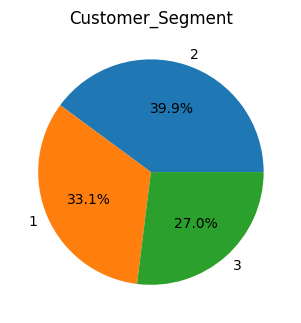

In [3]:
# Pie charts
f, ax = plt.subplots(figsize=(8,10))

# Sex
feature_used = 'Customer_Segment'

plt.subplot(2, 2, 1)
plt.title("Customer_Segment")
sums = df_raw[feature_used].value_counts()
plt.pie(sums.values, labels=sums.index, autopct='%1.1f%%')
plt.show()

We can see how the proportion of data between each of the input categories is similar, so that problems of imbalance may not appear in the training of the subsequent models.

#### Numerical features

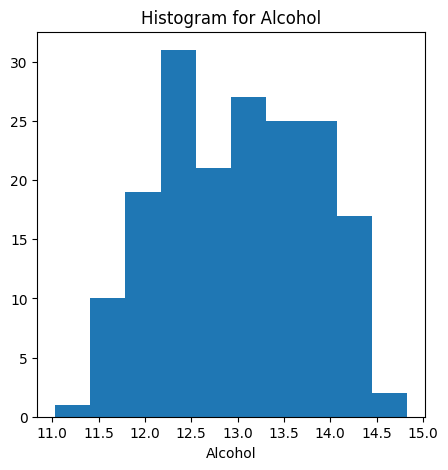

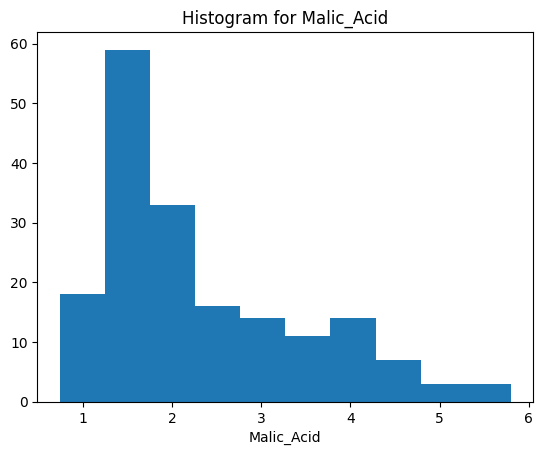

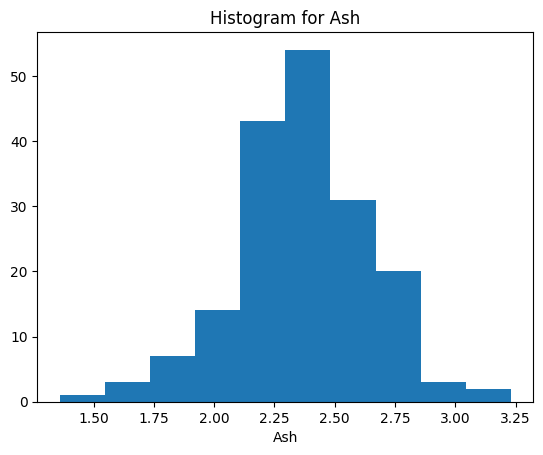

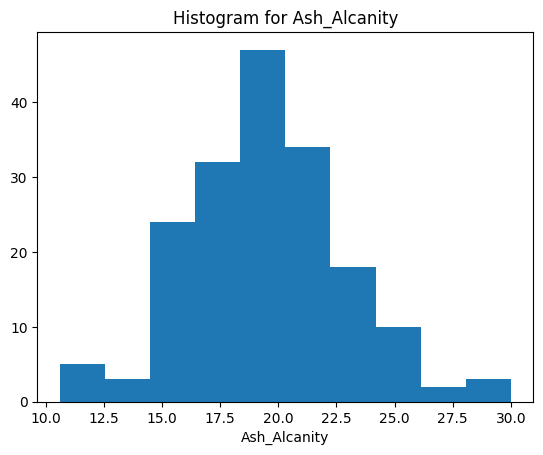

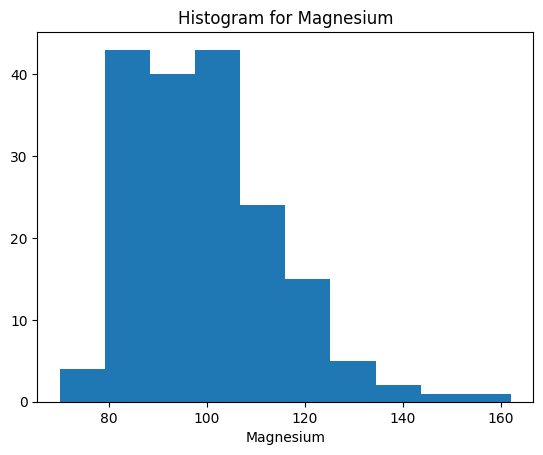

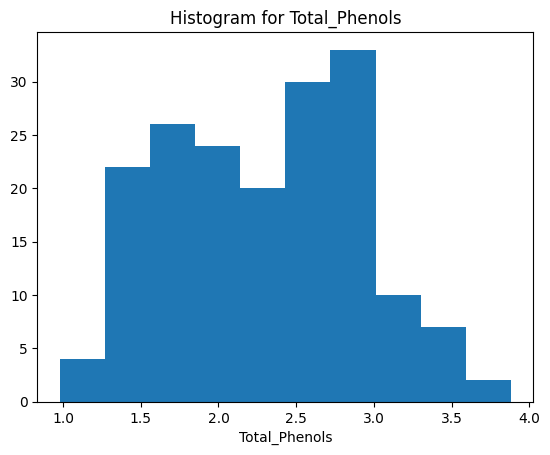

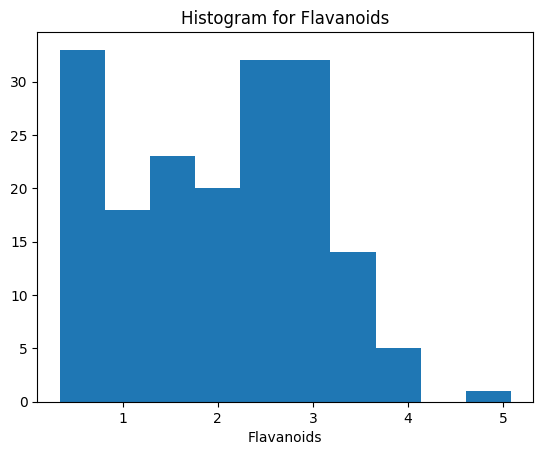

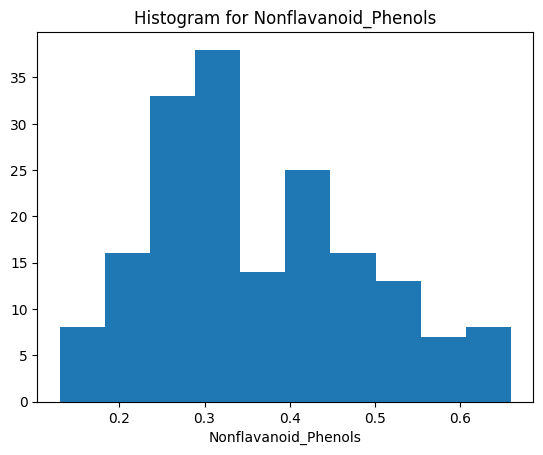

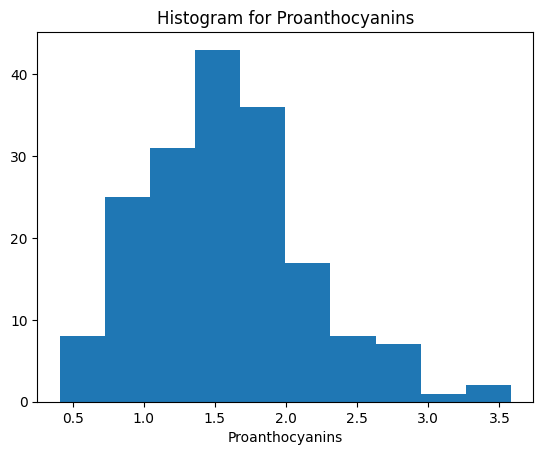

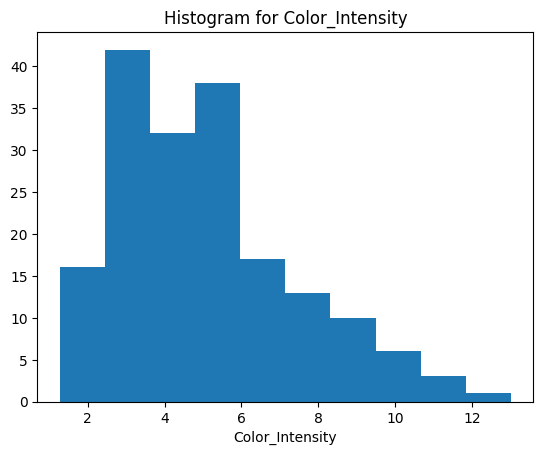

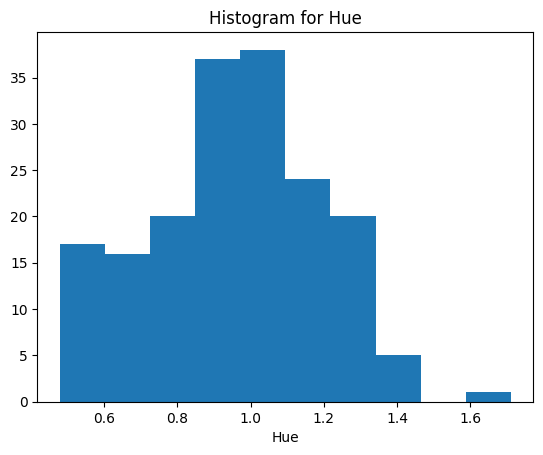

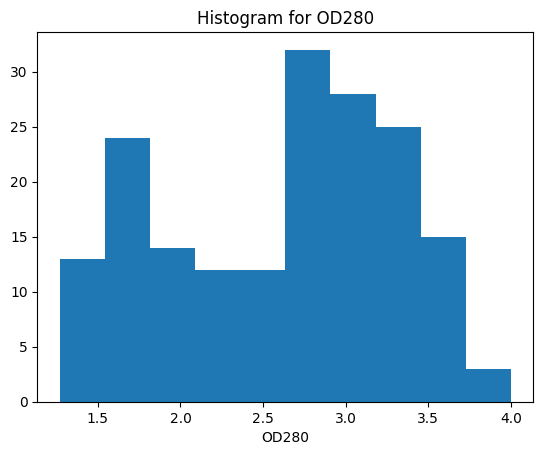

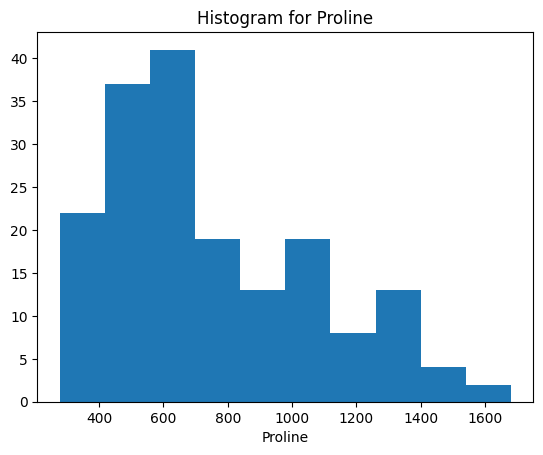

In [4]:
# Histograms
list_cont = [x for x in list(df_raw.columns) if x != "Customer_Segment"]

# Plot size
plt.figure(figsize=(5,5))

for column in list_cont:
    # Histogram
    plt.hist(df_raw[column])
    plt.title("Histogram for {0}".format(column))
    plt.xlabel(column)
    plt.show()

Visually, data distributions are seen that in many cases resemble a normal distribution (eg "Alcohol"). The graphs alone are not enough to be sure, but at first glance it does seem so, so that most wines have properties that range around a series of average values.
For example, with the same case of "Alcohol", the graduation of the wines oscillates between 12º and 13º. It is rare to see wines of less than 11.5º or more than 14º.

#### Null values

We check for null values in two ways. First, seeing that there are no null values as such. Second, making sure that there is no "object" column in the data (since sometimes nulls are represented by other characters, like "?", Blanks ... and they are not detected directly, but they would make the column was no longer numerical). This would not be enough to detect other types of nulls, such as values of type 9999 or similar (abnormally high), or values at 0, but looking at the previous histograms, it does not appear that there is any such value.

In [5]:
# See if the data is complete or if there is any NaN
df_raw.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
# See if the data is complete or if there is any NaN
df_raw.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

We confirm that there are no nulls in the data.

#### Anomaly detection

Another univariate analysis that can be applied to numerical variables is the detection of anomalies using a boxplot. We are going to use a boxplot because it is a "Non-parametric" technique (that is, it does not assume anything about the distribution of the data of the variable; it can be in any way).

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-pack

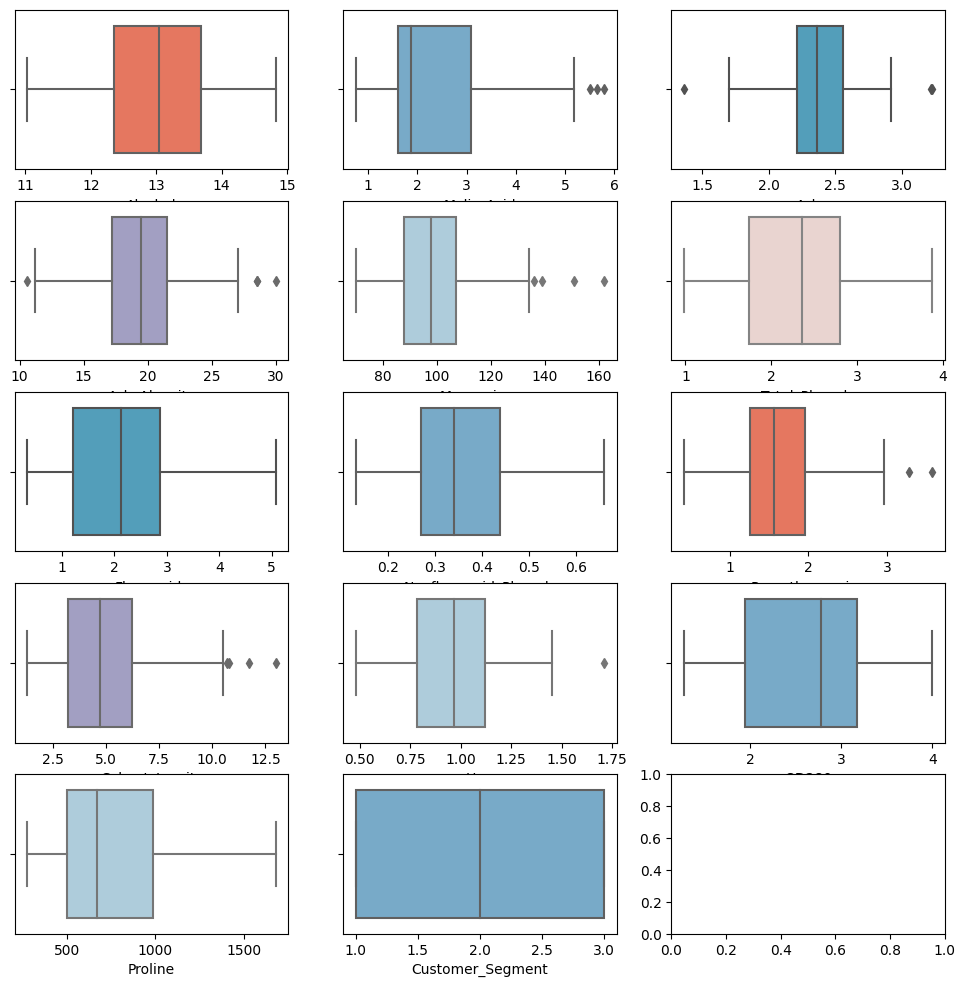

In [7]:
# Boxplots
f, axes = plt.subplots(5, 3, figsize=(12, 12))
sns.boxplot(x="Alcohol", data=df_raw, orient="v", ax=axes[0][0], palette="Reds")
sns.boxplot(x= "Malic_Acid", data=df_raw,  orient='v' , ax=axes[0][1],  palette="Blues")
sns.boxplot(x= "Ash", data=df_raw,  orient='v' , ax=axes[0][2],  palette="GnBu_d")
sns.boxplot(x= "Ash_Alcanity", data=df_raw,  orient='v' , ax=axes[1][0],  palette="Purples")
sns.boxplot(x= "Magnesium", data=df_raw,  orient='v' , ax=axes[1][1],  palette="Paired")
sns.boxplot(x= "Total_Phenols", data=df_raw,  orient='v' , ax=axes[1][2],  palette=sns.cubehelix_palette(8))
sns.boxplot(x= "Flavanoids", data=df_raw,  orient='v' , ax=axes[2][0],  palette="GnBu_d")
sns.boxplot(x= "Nonflavanoid_Phenols", data=df_raw,  orient='v' , ax=axes[2][1],  palette="Blues")
sns.boxplot(x= "Proanthocyanins", data=df_raw,  orient='v' , ax=axes[2][2],  palette="Reds")
sns.boxplot(x= "Color_Intensity", data=df_raw,  orient='v' , ax=axes[3][0],  palette="Purples")
sns.boxplot(x= "Hue", data=df_raw,  orient='v' , ax=axes[3][1],  palette="Paired")
sns.boxplot(x= "OD280", data=df_raw,  orient='v' , ax=axes[3][2],  palette="Blues")
sns.boxplot(x= "Proline", data=df_raw,  orient='v' , ax=axes[4][0],  palette="Paired")
sns.boxplot(x= "Customer_Segment", data=df_raw,  orient='v' , ax=axes[4][1],  palette="Blues")
plt.show()

In [ ]:
len(df_raw)

178

There are not too many anomalies within the data set. Only for "Malic_Acid", "Magnesium", "Ash", "Total_Phenols", "Hue", "Ash_Alcanity" and "Proanthocyanins" are some superior anomalies appreciated (in some cases, in fact, there are not more than a few points only) . Only "Ash" has inferior anomalies. Due to the already small size of the dataset (178 registers), we are not going to eliminate any of them, despite being anomalous values.

## 3. EDA (bivariate)
In bivariate analysis, we study the relationships between pairs of variables, in order to obtain insights on the relationship between them.

### 3.1. Visualizations
Within the bivariate analysis, the evolutions of a continuous variable can be visualized as a function of one or several categorical variables, in order to obtain visual insights on the joint evolutions.

We are going to see three examples of visualizations for this: through boxplots, swarmplots or through histograms.

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

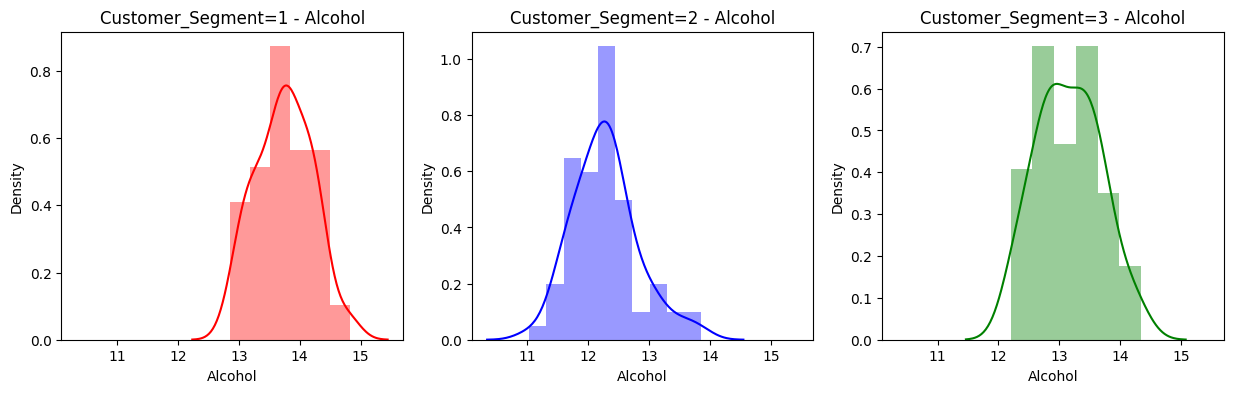

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

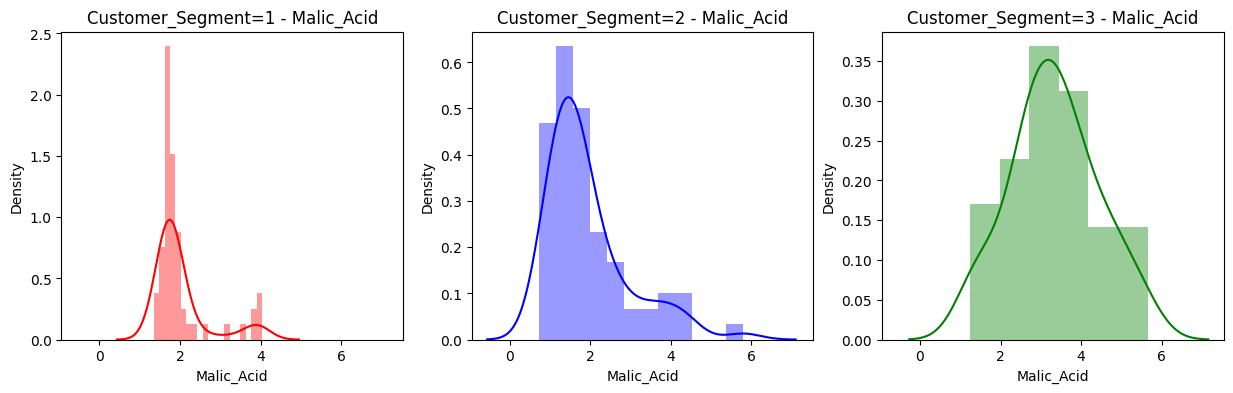

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

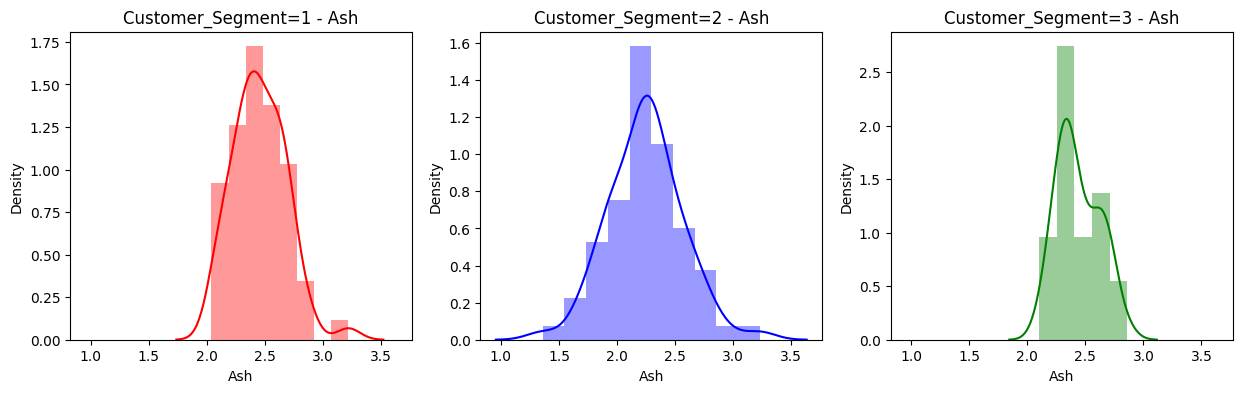

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

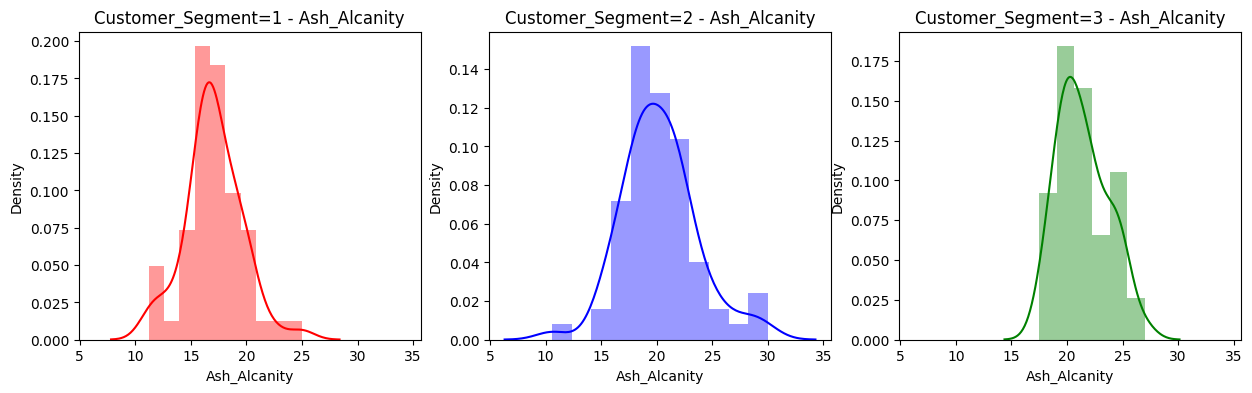

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

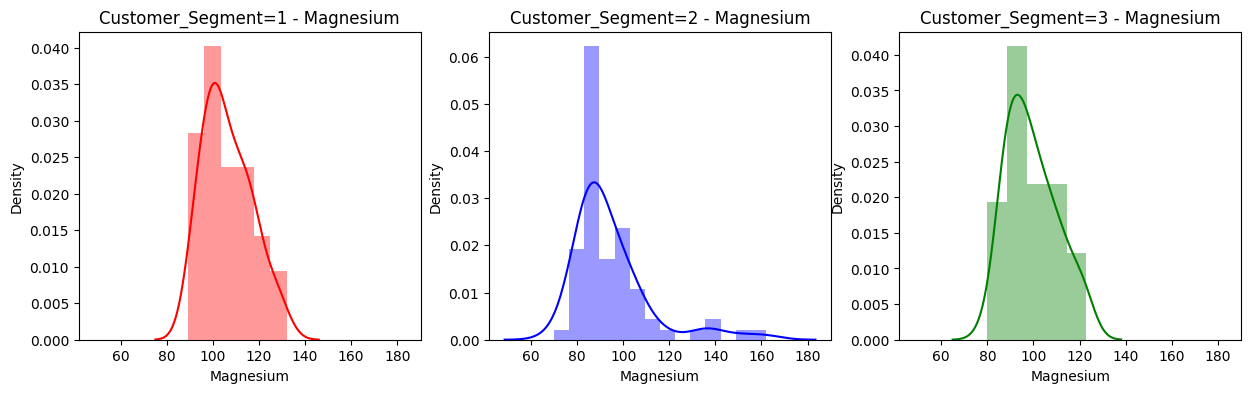

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

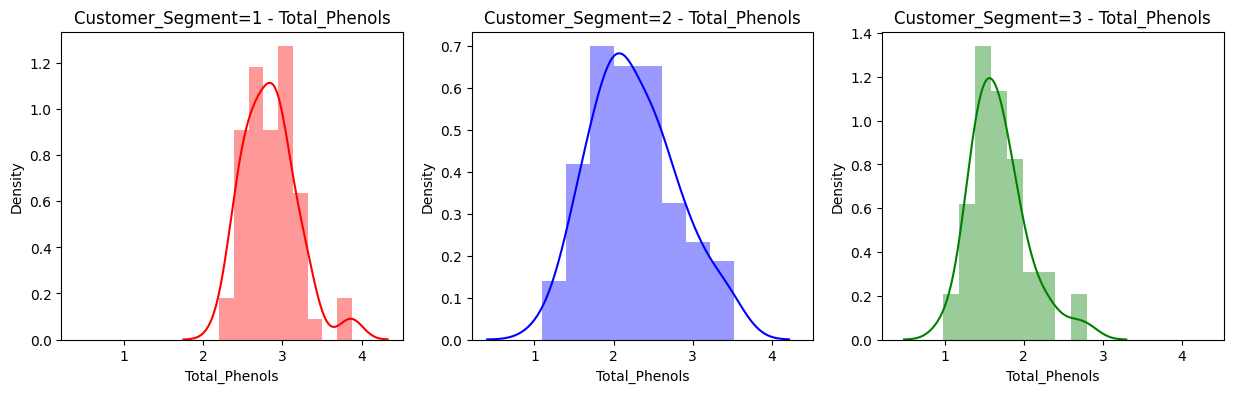

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

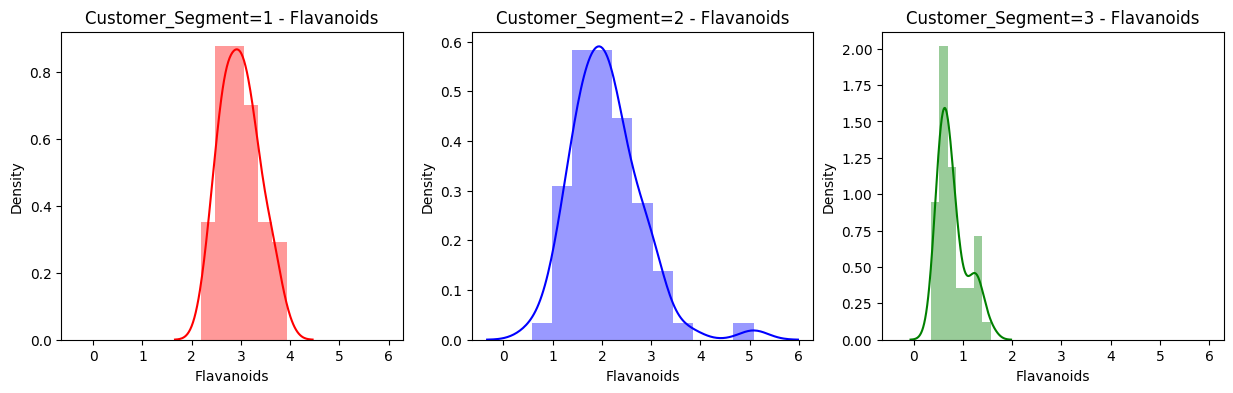

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

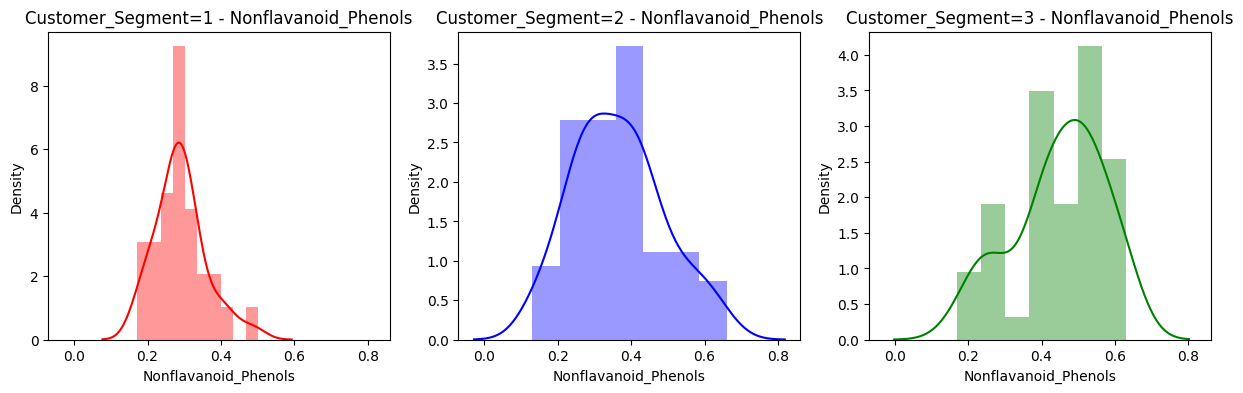

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

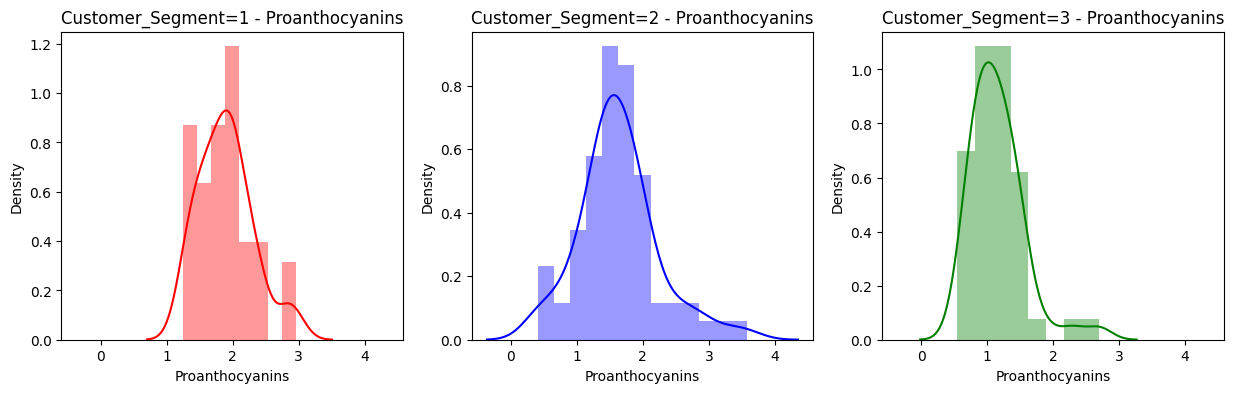

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

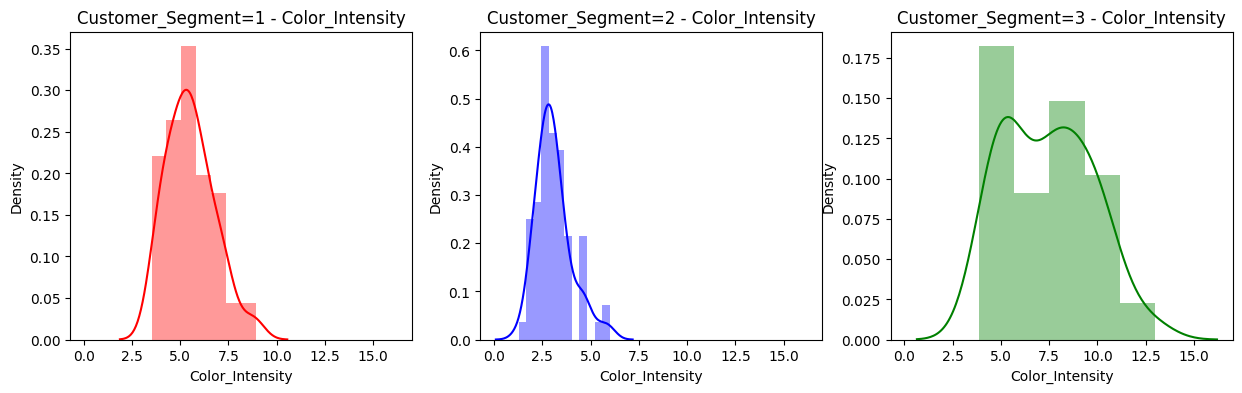

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

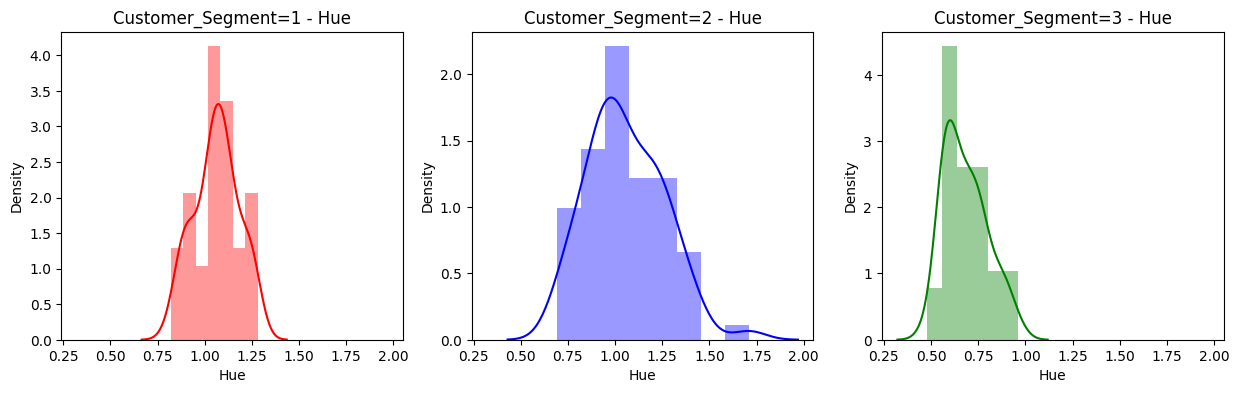

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

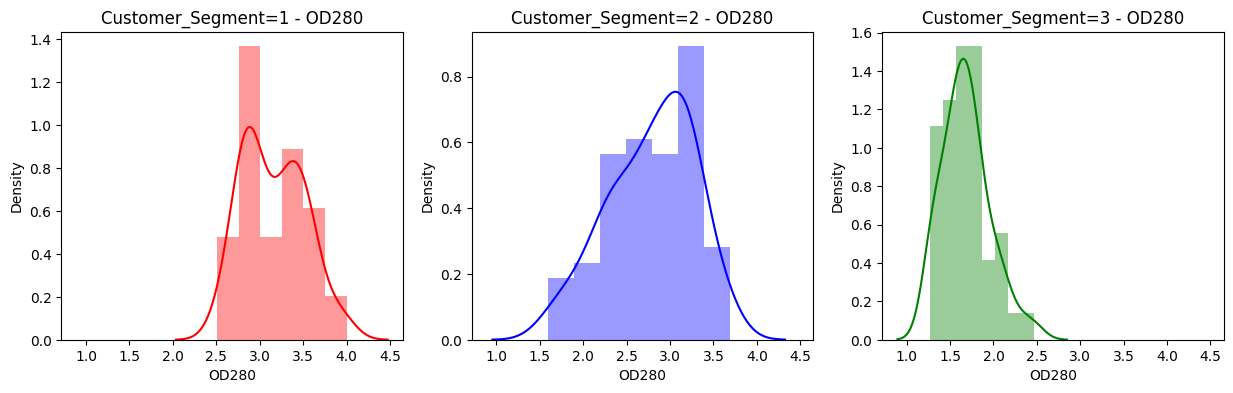

<ipython-input-8-6e5b9c4862ad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)
<ipython-input-8-6e5b9c4862ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column]

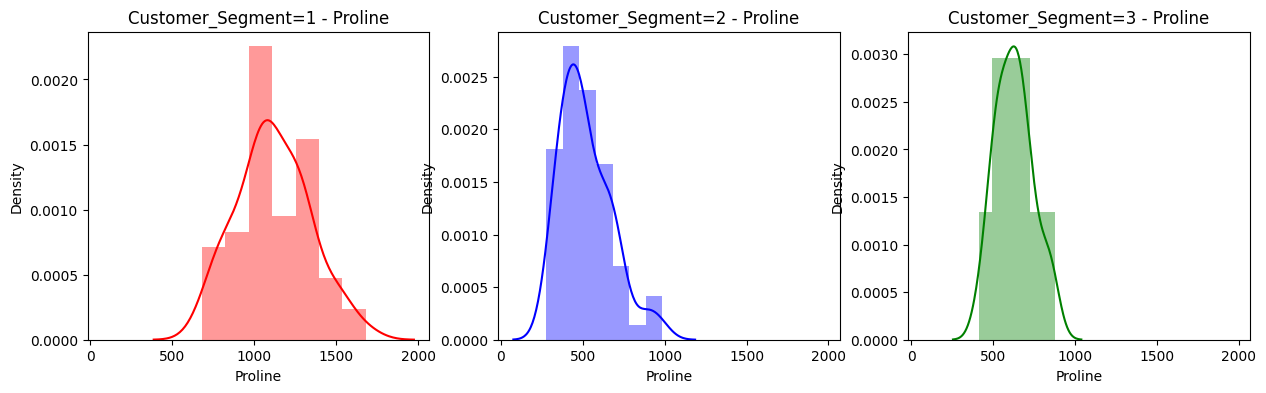

In [8]:
for column in list_cont:
    f, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

    title = 'Customer_Segment=1 - {0}'.format(column)
    sns.distplot(df_raw[df_raw["Customer_Segment"] == 1][column],color='red',ax=axes[0]).set_title(title)

    title = 'Customer_Segment=2 - {0}'.format(column)
    sns.distplot(df_raw[df_raw["Customer_Segment"] == 2][column],color='blue',ax=axes[1]).set_title(title)

    title = 'Customer_Segment=3 - {0}'.format(column)
    sns.distplot(df_raw[df_raw["Customer_Segment"] == 3][column],color='green',ax=axes[2]).set_title(title)

    plt.show()

We can see how the distributions of the different variables appear in some cases different according to the group of customter_segment (i.e. Color_Intensity). Visual analysis is not enough to ensure the relationships of input variables - output variables, but it is an interesting first analysis.

### 3.2. Correlations

Although we cannot perform a correlation analysis of the input variables with Customer_Segment because this is a non-ordinal categorical variable, we can see the correlation between the different input variables in order to, for example, eliminate highly correlated variables with each other.

As they are continuous variables in all cases, we can use Pearson's correlation.

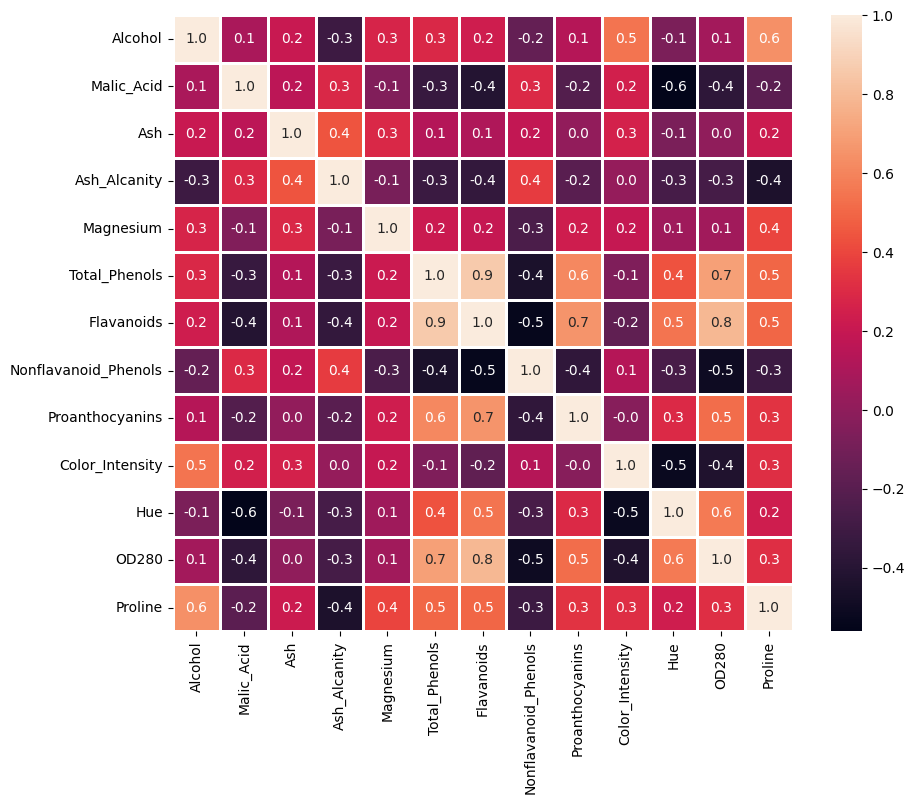

In [9]:
# Correlations
f,ax  =  plt.subplots(figsize=(10,8))
sns.heatmap(df_raw[list_cont].corr(method='pearson'),annot=True,fmt=".1f",linewidths=2,ax=ax)
plt.show()

** Correlation Analysis **
* At a general level, it can be seen that there are small positive correlations between ash and alcohol, that is, if one of the two increases the other will also do so and vice versa.
* Magnesium and Alcohol also show positive correlations, as do Flavanoids, Proanthocyannis and OD290, which means that if one of the aforementioned increases, alcohol will also increase, and if one decreases, alcohol will also decrease.
* Flavanoids show a negative correlation with Malic_acid, which means that if one increases the other will decrease and vice versa.
* There is also a strong correlation between Flavanoids and Proanthocyannis, quite strong and positive of 0.6, which means that if one increases the other will also do so and if one decreases the other will also do so.
* Malic_Acid and Flavonoids also present a negative correlation of -0.4 which indicates that if one increases the other will decrease and vice versa.
* Malic_Avid and Hue show negative correlations of -0.6 and, as has been seen, if one increases the other, it will also do so.
* Nonflavanoid_phenols and Flavanoids also show negative correlations, as well as color_intensity and Hue and OD280, so if any of these increases the other will decrease and vice versa.
* Flavanoids and Total_phenols, as well as Proanthocyanins show positive correlations, 0.9 and 0.7 respectively.

At a general level, it can be seen that there are variables that have strong correlations, both positive and negative, so it will be chosen to remove them from the model to maintain those that do not have many correlations, therefore the ones that will be discarded will be:
* OD280
* Flavonoids

In [10]:
list_cont = [x for x in list_cont if x not in ['OD280', 'Flavonoids']]
list_cont

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'Proline']

### 3.3 Hypothesis Testing for continuous variables
Since the output variable is categorical, but all the input variables are continuous, we can use the Tukey test to analyze whether there is a significant difference between the group means.

In Tukey's test, we have to first pass the column with the continuous variable as a parameter, and then the column with the categorical variable to separate by groups.

In [11]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

for column in list_cont:
    print("*"*100)
    print("Hypothesis contrast for Customer_Segment - {0}".format(column))
    MultiComp = MultiComparison(df_raw[column],
                                df_raw['Customer_Segment'])
    print(MultiComp.tukeyhsd().summary())

    list_unique = list(df_raw['Customer_Segment'].unique())
    for cat in list_unique:
        mean_iter = np.round(df_raw[df_raw['Customer_Segment']==cat][column].mean(), 2)
        print("Mean for {0}=={1}: {2}".format(column, cat, mean_iter))
        print()

    print("*"*100)
    print()

****************************************************************************************************
Hypothesis contrast for Customer_Segment - Alcohol
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   -1.466   0.0 -1.6792 -1.2528   True
     1      3   -0.591   0.0 -0.8262 -0.3558   True
     2      3    0.875   0.0  0.6489  1.1011   True
---------------------------------------------------
Mean for Alcohol==1: 13.74

Mean for Alcohol==2: 12.28

Mean for Alcohol==3: 13.15

****************************************************************************************************

****************************************************************************************************
Hypothesis contrast for Customer_Segment - Malic_Acid
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------

It can be seen how all the variables change for at least 2 of the groups significantly between them. In this way, all of them would be necessary to build a supervised learning model that tries to predict the output variable Customer_Segment.

## 4. Data preparation

Before using the data set within an ML model, we have to do some preprocessing that would normally involve transforming categorical variables with label encoding. In this case, they are all numeric, so it is not necessary.

At this point we only need to scale the data set, since for ML clustering models it is necessary to have all the data in the same magnitudes, and, as we have seen in the histograms, in the source data there are some variables with a magnitude higher than others (i.e. "Proline" vs "Hue").

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df_raw[list_cont + ['Customer_Segment']].copy()
X[list_cont] = sc.fit_transform(X[list_cont])
print(X.shape)
X.head()

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline,Customer_Segment
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,-0.037874,1


## 5. Unsupervised Clustering Model

In this section we are going to carry out a clustering analysis in which we try to group the different wines and see if these groupings respond to the groups of the original Customer_Segment variable.

First, we will analyze whether the number of clusters proposed with automatic cluster selection techniques correspond to the same number of groups in Customer_Segment (3). Later we will see if assigning 3 clusters, the data groups are similar to what Customer_Segment shows.

### 5.1 Selection of the number of clusters

In [13]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import metrics

### Silhouette Score
def silhouette_selection(reference, X, figure=False):
    """
    In this case a reference value is used to stop when the difference of using a k or another
    is very significant (since it would mean that the model has worsened a lot)

    """
    shc = [] # We put a vector to 0 to see the different scores according to the number of clusters that I define
    diff = 0
    i = 1
    valores = []

    while abs(diff) < reference:
        i += 1 # This metric needs at least 2 clusters
        valores.append(i)
        print("Iteration N Clusters: k: {k}".format(k=i))
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(X)
        score = metrics.silhouette_score(X, kmeans.labels_, metric="euclidean", sample_size=len(X))
        # First iteration
        if i == 2:
            pass
        # Remaining iterations
        else:
            diff = (shc[-1] - score)/shc[-1]
        shc.append(score)
        print("Silhouette score = {0} for N Clusters {1}".format(score, i))
        print("Difference with previous score", diff)

    if figure:
        plt.figure()
        plt.bar(valores, shc, width=0.7, color='blue', align='center')
        plt.title('Silhouette Score vs N Clusters')
        plt.show()

    # Final clusters
    k = i-1
    return shc, k

def elbow_method(epsilon, X, figure=False):
    wcss = [] # We put a vector to 0 to see the different wcss according to the number of clusters that we define

    diff = np.inf # Difference value between two iterations
    i_init = 2
    i = i_init
    while diff > epsilon:
        print("Iteration N Clusters: k: {k}".format(k=i))

        # With init = k-means ++ and with n_init I define that I want to use the option of ++
        # (which takes into account the starting position and its influence)
        # and take 10 starting positions to compare
        kmeans = KMeans(n_clusters = i,
                        init = 'k-means++',
                        max_iter = 300,
                        n_init = 10,
                        random_state = 0)
        kmeans.fit(X)

        # First iteration
        if diff == np.inf:
            diff = kmeans.inertia_
        # If it is 0
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        # Remaining iterations
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1

    if figure:
        plt.plot(range(i_init,len(wcss)+i_init), wcss)
        plt.title('Elbow Method')
        plt.xlabel('N Clusters')
        plt.ylabel('WCSS')
        plt.show()

    # Final clusters
    k = i-1
    return wcss, k

#### Silhouette Metric

Iteration N Clusters: k: 2
Silhouette score = 0.25239521268491494 for N Clusters 2
Difference with previous score 0
Iteration N Clusters: k: 3
Silhouette score = 0.2770776824135324 for N Clusters 3
Difference with previous score -0.09779293935907801
Iteration N Clusters: k: 4
Silhouette score = 0.23645154463177948 for N Clusters 4
Difference with previous score 0.14662363791941682
Iteration N Clusters: k: 5
Silhouette score = 0.21213893576002218 for N Clusters 5
Difference with previous score 0.10282279572171438
Iteration N Clusters: k: 6
Silhouette score = 0.21206775091964028 for N Clusters 6
Difference with previous score 0.0003355576388034267
Iteration N Clusters: k: 7
Silhouette score = 0.20260023527292978 for N Clusters 7
Difference with previous score 0.04464382540793798
Iteration N Clusters: k: 8
Silhouette score = 0.1775168428322543 for N Clusters 8
Difference with previous score 0.12380732138284427
Iteration N Clusters: k: 9
Silhouette score = 0.1348956645620932 for N Clusters

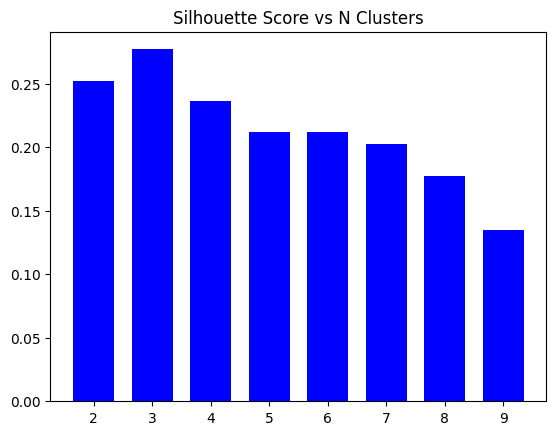

k optimal:  8


In [14]:
# Dataset
X_clust = X.copy().drop(columns=['Customer_Segment']) # We remove this column from the clustering data

# Obtaining optimal k
reference = 0.15
shc, k = silhouette_selection(reference, X_clust, figure=True)
print("k optimal: ", k)

We see that the number of clusters with Silhouette (5) does not match the 3 groups of Customer_Segment. Let's see the clusters with Elbow Method.

#### Elbow Method

Iteration N Clusters: k: 2
Iteration N Clusters: k: 3
Iteration N Clusters: k: 4


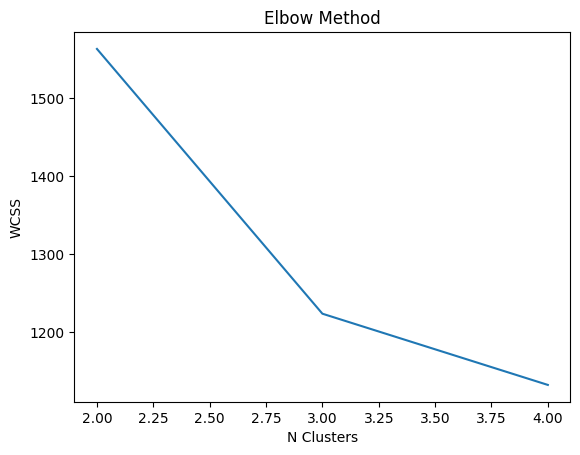

k optimal:  4


In [15]:
# Obtaining optimal k
reference = 0.15
wcss, k = elbow_method(reference, X_clust, figure=True)
print("k optimal: ", k)

We see that the number of clusters with Elbow Method (4) also does not match the 3 groups of Customer_Segment.

#### Hierarchical Clustering

With a hierarchical clustering we can also visually see how many clusters there would be

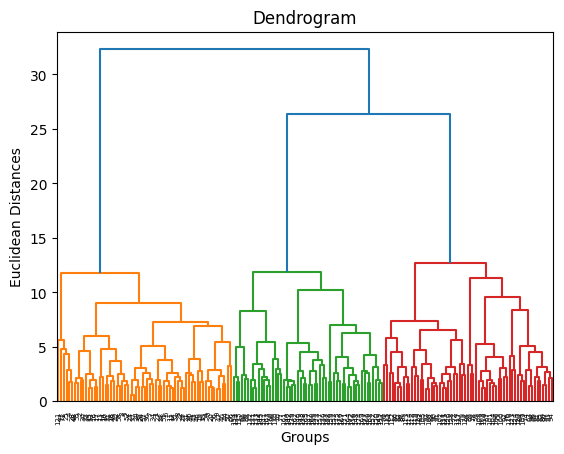

In [16]:
### Dendogram to have the optimal number of clusters
# A new library is going to be used, and with this we seek to see the optimal number of clusters
import scipy.cluster.hierarchy as sch

# The 'ward' method is used, which tries to minimize the variance between clusters.
# Instead of minimizing the WC minimal square, it is done with the variance -> minimize the variance in each cluster
dendrogram = sch.dendrogram(sch.linkage(X_clust, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Groups')
plt.ylabel('Euclidean Distances')
plt.show()

On the other hand, a hierarchical clustering is grouping the wines into 3 categories, such as Customer_Segment

### 5.2. Clustering Model

Knowing that hierarchical clustering gives us 3 groups, we are going to use this algorithm to group the data and see if the groups match

In [17]:
# Train the algorithm with the data from the set
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X_clust) # With fit_predict you get the cluster assigned to each point

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


To be able to make a comparison of whether the groups are the same, first we have to see to which group in each cluster each Customer_Segment group would correspond (since as we have not used that variable at all, we do not know the order of class assignment). We do it in a simple way, by seeing the outputs and analyzing with which class they are most similar.

In [18]:
y_test = list(df_raw['Customer_Segment'].values)
print(y_test)
print()
print(y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 0 0 0 0 1 0 2 0 2 1 0 1
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [19]:
def _change_labels(x):
    if x == 1:
        return 1
    elif x == 0:
        return 2
    else:
        return 3
y_pred_c = [_change_labels(x) for x in y_pred]
print(y_pred_c)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


[[59  0  0]
 [ 4 61  6]
 [ 0  0 48]]


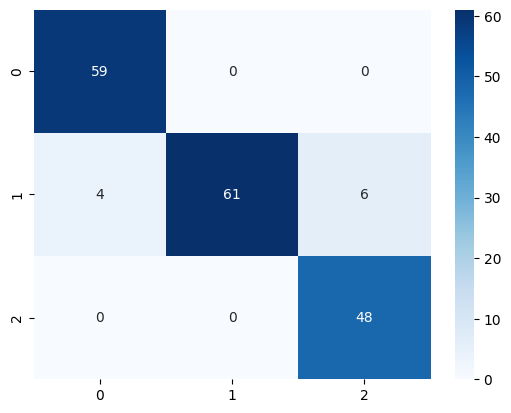

In [20]:
# Evaluate results
from sklearn.metrics import confusion_matrix, classification_report

# COnfusion Matrix
cm = confusion_matrix(y_test, y_pred_c)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

With this, we see a great similarity in the results of clusters with hierarchical clustering with respect to the original Customer_segment groups.

### 5.3. Visualizations (optional)

Optionally, we can visualize the clusters using the reference to the RadarChart mentioned in the course, and making some modification to the code mentioned in the page

#### Clustering for inferred groups

In [24]:
# Get the centroids
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_clust, y_pred)
df = pd.DataFrame(clf.centroids_)
df.columns = list(X_clust.columns)
df['group'] = [1, 2, 3]
df = df[['group'] + list(X_clust.columns)]
df.head(100)

,group,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,1,-0.952120,-0.317232,-0.540363,0.194488,-0.521692,-0.080165,0.046323,-0.007013,0.152379,-0.906365,0.417558,-0.778504
1,2,0.851373,-0.318028,0.347515,-0.593332,0.459486,0.900051,0.990039,-0.580264,0.551027,0.175365,0.491708,1.068308
2,3,0.082274,0.729388,0.204976,0.472521,0.053252,-0.959502,-1.207373,0.684897,-0.814996,0.819265,-1.045346,-0.366938


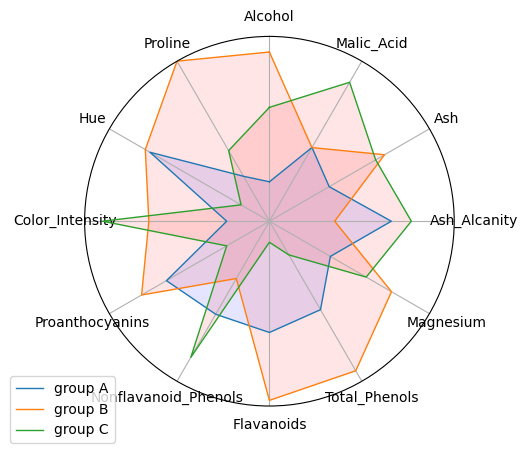

In [25]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi


# ------- PART 1: Create background

# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
max_ref = max(df.max().values[1:])
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(-1.5,max_ref)

# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

#### Clustering over the original groups

In [26]:
# Get centroids
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_clust, df_raw['Customer_Segment'])
df = pd.DataFrame(clf.centroids_)
df.columns = list(X_clust.columns)
df['group'] = [1, 2, 3]
df = df[['group'] + list(X_clust.columns)]
df.head(100)

,group,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,1,0.919195,-0.292342,0.325604,-0.737997,0.463226,0.873362,0.956884,-0.578985,0.540383,0.203401,0.458847,1.174501
1,2,-0.891720,-0.362362,-0.444958,0.223137,-0.364567,-0.058067,0.051780,0.014569,0.069002,-0.852799,0.433611,-0.724110
2,3,0.189159,0.895331,0.257945,0.577065,-0.030127,-0.987617,-1.252761,0.690119,-0.766287,1.011418,-1.205382,-0.372578


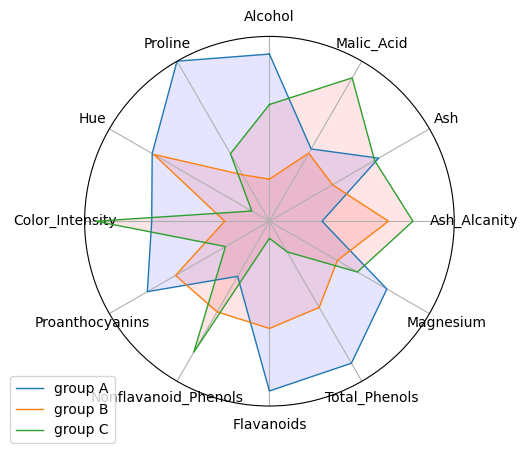

In [27]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi


# ------- PART 1: Create background

# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
max_ref = max(df.max().values[1:])
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(-1.5,max_ref)

# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

We can observe how the clusters are relatively similar, as well as the value of their centroids.

## 6. Predictive model with PCA

Finally, we use PCA to generate a smaller subset of features and train a supervised model.

In [28]:
### Data preparation
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_raw[list_cont],
                                                    df_raw['Customer_Segment'],
                                                    test_size = 0.25,
                                                    random_state  =  0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape, X_test_pca.shape)

(133, 12) (45, 12)


#### Explained Variance

Explained variance for each PC
[0.35337456 0.19647063 0.11300279 0.08040189 0.06692123 0.05002101
 0.04521002 0.0272468  0.0243479  0.01923176 0.01620162 0.00756978]
Model parameters
[[ 0.19044715 -0.25513142 -0.0083227  -0.27955311  0.16970375  0.4116273
   0.44462219 -0.32327901  0.32767671 -0.06181845  0.30192965  0.3429708 ]
 [-0.48533439 -0.28557586 -0.34541558 -0.02379836 -0.20729255 -0.05576351
   0.03544801 -0.09112341 -0.01898779 -0.55296753  0.32937799 -0.30455769]
 [ 0.17104458 -0.02579953 -0.62983295 -0.60299468 -0.11530898 -0.18901021
  -0.15815211 -0.12185997 -0.20043627  0.19439639 -0.16520335  0.12508498]
 [-0.20485894  0.0290501  -0.06782229  0.03944352  0.82000877 -0.22444359
  -0.16150397 -0.41285799  0.04005718 -0.06566519 -0.14163893 -0.07570082]
 [-0.19598586  0.50027204 -0.27710334 -0.0169678  -0.1214492   0.20502297
   0.13743427 -0.02021831  0.63004365  0.03540552 -0.32662198 -0.23080622]
 [-0.13033679 -0.59850107 -0.14930214  0.04220774  0.17452095 -0.05420597

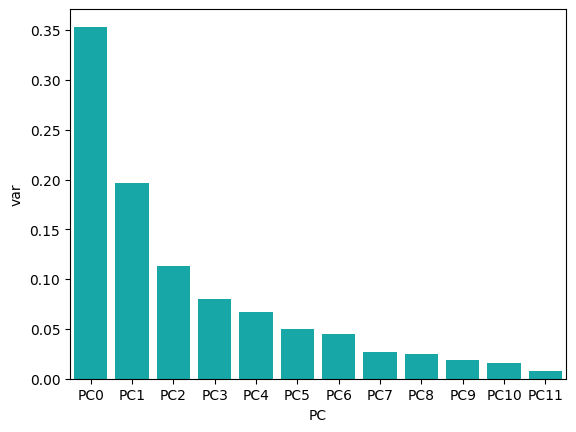

In [30]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance for each PC")
print(explained_variance)
print("Model parameters")
print(pca.components_)

# Visualizing PC
sns.barplot(x='PC',y="var",
           data=pd.DataFrame({'var':explained_variance,
             'PC':['PC{0}'.format(i) for i in range(len(explained_variance))]}), color="c")
plt.show()

In [ ]:
print(np.sum(explained_variance))
print(np.sum(explained_variance[:5]))

1.0
0.8101711050777893


As we can see, with only the first 5 variables it is enough to have more than 80% explained variance, so we will only use those to build the supervised model.

#### Supervised Model

In [31]:
# Transformed to dataframes
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = ['PC{0}'.format(i) for i in range(len(explained_variance))]

X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.columns = ['PC{0}'.format(i) for i in range(len(explained_variance))]

X_train_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.937065,-0.950360,0.173897,0.903721,0.142221,-1.380444,-0.011906,-0.166635,0.754687,-0.511009,0.249082,-0.123101
1,-2.558182,-0.333491,1.193228,-0.599036,-0.409970,1.148555,-0.619113,-0.641896,0.134812,0.373141,0.215305,-0.198479
2,1.651047,1.460770,-0.593158,0.608052,0.016291,-0.362100,1.518803,-0.675508,-0.280647,1.153268,0.434215,0.914198
3,-1.839661,-1.010191,1.468193,1.712165,0.366667,-0.336063,0.146468,-0.719000,-0.932009,-0.111229,0.676096,-0.168842
4,2.512303,-2.008867,-1.000236,0.186616,-0.888419,0.079161,-0.351271,0.143823,-0.149493,0.177960,-0.394582,-0.274280


In [32]:
# Training (RF)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, random_state=0,
                               n_estimators=100)
model.fit(X_train_pca[list(X_train_pca.columns)[:5]], y_train)

RandomForestClassifier(max_depth=5, random_state=0)

[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]


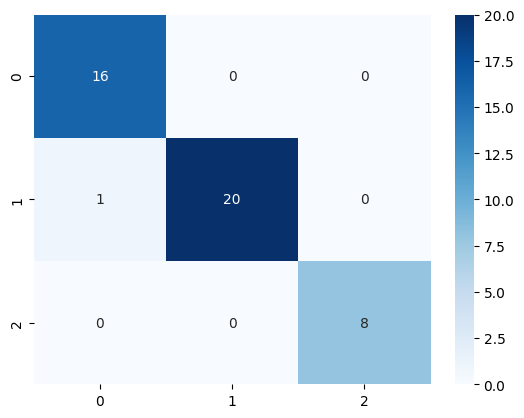

In [33]:
# Get predictions
y_pred = model.predict(X_test_pca[list(X_train_pca.columns)[:5]])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [34]:
# Metrics
f1 = np.round(f1_score(y_test, y_pred, average='macro'), 4)
precision = np.round(precision_score(y_test, y_pred, average='macro'), 4)
recall = np.round(recall_score(y_test, y_pred, average='macro'), 4)
print("precision:", precision, " recall:", recall, " f1:", f1)

precision: 0.9804  recall: 0.9841  f1: 0.9818


As we can see, the metrics are extremely good, having a very good predictive capacity for all classes.

With these metrics, there is little need for further testing of other models, as there is little room for improvement with this data.